**Цель работы:**

Изучение алгоритмов и методов регрессии на практике .

# 1. Простая линейная регрессия

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Импортированы колонки из файла regression.xlsx

In [101]:
df = pd.read_excel('regression.xlsx')

x1 = df['x1'].values
x2 = df['x2'].values
y = df['y'].values



Далее данные были разделены на обучающую и валидационную выборки. В данном случае в переменной X присваиваются значения, которые будут использоваться для обучения модели, присвоены все значения из всех числовых столбцов кроме salary. Y- переменная salary, которую надо предсказать. Train_test_split разделяет данные на обучающую (X_train, Y_train) и валидационные (X_valid, Y_valid) выборки. Test_size=0.50 означает, что 50% данных будут отложены для тестирования. Установка random_state на 0 гарантирует, что при каждом запуске кода будут выбраны одни и те же случайные данные для обучающей и тестовой выборки.

In [118]:
from sklearn.model_selection import train_test_split
X1_train_11, X1_valid_11, Y_train_11, Y_valid_11 = train_test_split(
    x1,
    y,
    test_size=0.50,
    random_state=0)

from sklearn.model_selection import train_test_split
X2_train, X2_valid, Y_train, Y_valid = train_test_split(
    x2,
    y,
    test_size=0.50,
    random_state=0)


Созданы две модели линейной регрессии. Для массива X1 использовался метод reshape(), который преобразует одномерный массив в двумерный. Для созданного объекта модели линейной регрессии выполняется метод fit(), который обучает модель на представленных данных.

In [126]:
model_1 = LinearRegression ()
model_2 = LinearRegression ()
model_1.fit(np.array(X1_train_11).reshape(-1,1), Y_train_11)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Также обучена вторая модель с помощью данных Х2.

In [57]:
model_2.fit(np.array(X2_train).reshape(-1,1), Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


С помощью predict() выполнено предсказание значений для соответствующих значений X1 и X2, на основе обученных моделей линейной регрессии. Созданы датафреймы с актуальными и предсказанными значениями.

In [ ]:
y_predict=model_1.predict(np.array(X1_valid).reshape(-1, 1))
predict_1=pd.DataFrame({'Actual': Y_valid_11, 'Predicted': y_predict})
predict_1

,Actual,Predicted
0,1.962922,1.641268
1,3.732444,1.867371
2,-0.811533,-0.659076
3,-0.756194,0.671502
4,-3.630532,-2.231815
...,...,...
495,0.918867,-2.117290
496,-0.625443,-0.676138
497,2.570486,2.358719
498,1.521499,1.270138


In [59]:
y_predict_2=model_2.predict(np.array(X2_valid).reshape(-1, 1))
predict_2=pd.DataFrame({'Actual': Y_valid, 'Predicted': y_predict_2})
predict_2

,Actual,Predicted
0,1.962922,0.860985
1,3.732444,1.019594
2,-0.811533,-0.991629
3,-0.756194,-1.473078
4,-3.630532,-1.543339
...,...,...
495,0.918867,1.580864
496,-0.625443,0.282120
497,2.570486,0.111380
498,1.521499,-0.040229


В целом предсказанные значения близки к фактическим. Однако, некоторые предсказанные значения могут немного отличаться от фактических.

Для вычисления метрик качества регрессии, из бибилотеки sklearn импортируются метрики. Функция mean_squared_error вычисляет среднеквадратичную ошибку (MSE) между фактическими и предсказанными значениями. Функция mean_absolute_error вычисляет среднюю абсолютную ошибку (MAE) между фактическими и предсказанными значениями. Root Mean Squared Error (RMSE) представляет собой стандартное отклонение ошибок модели, это квадратный корень из среднеквадратичной ошибки. Функция r2_score вычисляет коэффициент детерминации между фактическими значениями (y) и предсказанными значениями (y_prediction). R2 - это мера того, насколько хорошо модель соответствует данным.

Вычислены метрики для обеих моделей.

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_valid, y_predict)))
print('R2 metric:', metrics.r2_score(Y_valid, y_predict))

print('Mean Absolute Error 2:', metrics.mean_absolute_error(Y_valid, y_predict_2))
print('Mean Squared Error 2:', metrics.mean_squared_error(Y_valid, y_predict_2))
print('Root Mean Squared Error 2:', np.sqrt(metrics.mean_squared_error(Y_valid, y_predict_2)))
print('R2 metric 2:', metrics.r2_score(Y_valid, y_predict_2))

Mean Absolute Error: 0.9469405483078429
Mean Squared Error: 1.5366454283055293
Root Mean Squared Error: 1.2396150323005644
R2 metric: 0.5828227401376669
Mean Absolute Error 2: 1.3948209335689121
Mean Squared Error 2: 2.7858743614012784
Root Mean Squared Error 2: 1.6690938743525716
R2 metric 2: 0.24367494868892225


Видно, что модель 1 значительно лучше по всем метрикам, однако обе имеют слабое качество. Ошибки предсказаний в Модели 1 на 25-35% меньше, чем в Модели 2

Модель 1 (R² = 0.52) - объясняет 52% дисперсии данных

Модель 2 (R² = 0.26) - объясняет только 26% дисперсии

Модель 1 может использоваться для грубых предсказаний. Модель 2 практически бесполезна для прогнозирования

Были выведены коэффициенты a и b для обеих моделей, где a- коэффициент наклона, b- коэффициент смещения. Coef выводит массив коэффициентов наклона для каждой независимой переменной, [0] используется для извлечения первого (и единственного) элемента этого массива. Intercept извлекает коэффициент смещения из обученной модели линейной регрессии.

In [61]:
a = model_1.coef_[0]
b = model_1.intercept_
a2 = model_2.coef_[0]
b2 = model_2.intercept_

print("Коэффициент 1 а:", a)
print("Коэффициент 1 b:", b)
print("Коэффициент 2 а:", a2)
print("Коэффициент 2 b:", b2)

Коэффициент 1 а: 1.3009697247558418
Коэффициент 1 b: 0.012082117997655059
Коэффициент 2 а: 0.8718103962484962
Коэффициент 2 b: -0.05090398356845649


Для визуализации регрессии Модели 1, создается массив regression_line, содержащий предсказанные значения Y на основе коэффициента a, переменной X1 и коэффициента смещения b. С помощью plot построена линия регрессии, где X1 - это значения независимой переменной, regression_line - соответствующие предсказанные значения. Scatter строит точечный график на основе X1 и Y значений.

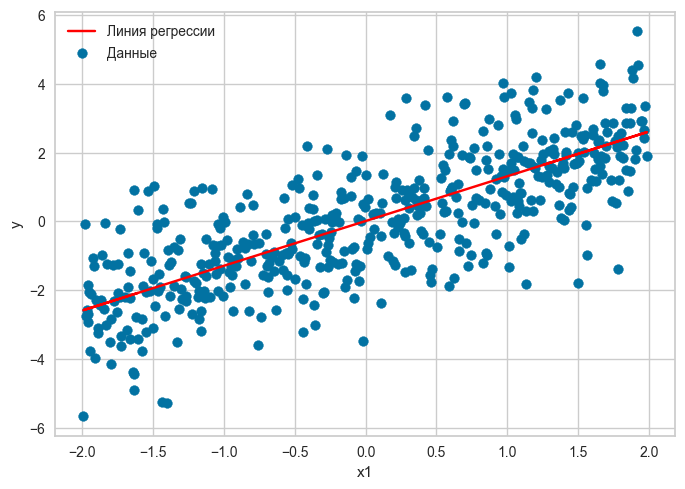

In [62]:
import matplotlib.pyplot as plt
regression_line = a * X1_valid + b

plt.plot(X1_valid, regression_line,  color='red', label='Линия регрессии')
plt.scatter(X1_valid, Y_valid, label='Данные' )
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

Для модели 2

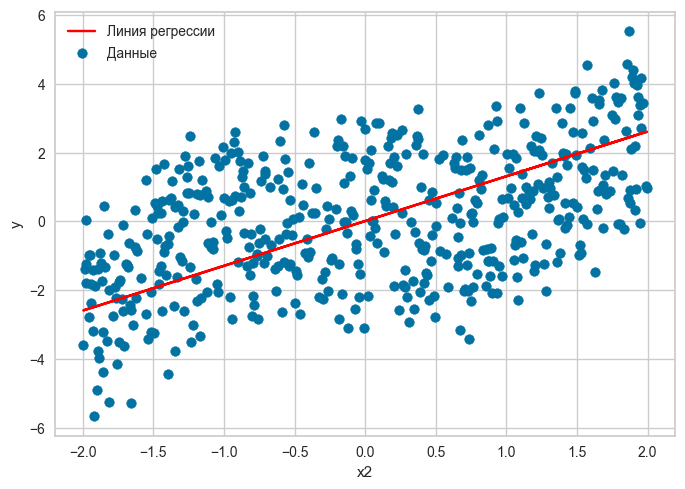

In [63]:
regression_line = a * X2_valid + b

plt.plot(X2_valid, regression_line,  color='red', label='Линия регрессии')
plt.scatter(X2_valid, Y_valid, label='Данные' )
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

Далее создается график разницы между предсказанными и фактическими значениями. Scatter создает точечный график, по оси X отложены значения переменной X1, а по оси Y - разница между предсказанными и фактическими значениями. Аxhline добавляет горизонтальную линию на уровне y=0, которая указывает на нулевую разницу между предсказанными и фактическими значениями.

Для модели 1

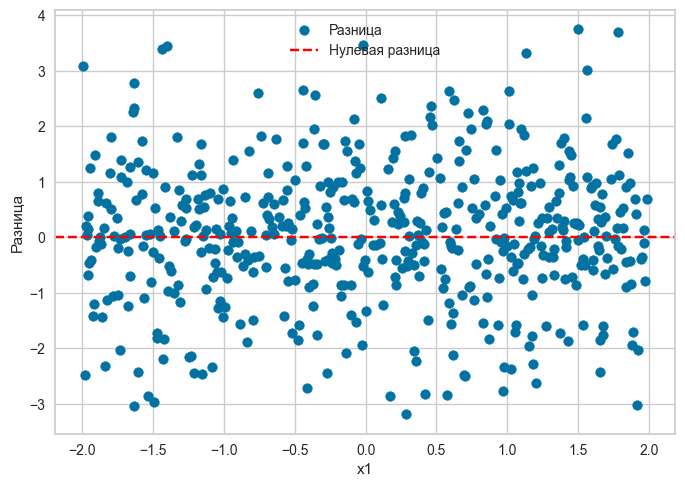

In [64]:
difference = y_predict - Y_valid

plt.scatter(X1_valid, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x1')
plt.ylabel('Разница')
plt.legend()
plt.show()

Для модели 2

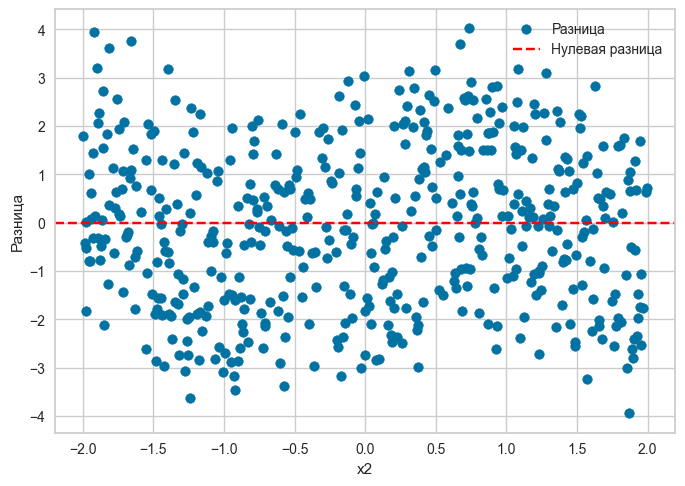

In [65]:
difference = y_predict_2 - Y_valid

plt.scatter(X2_valid, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x2')
plt.ylabel('Разница')
plt.legend()
plt.show()

Точки выше линии указывают на случаи, где предсказанные значения были выше фактических, а точки ниже линии - на случаи, где предсказанные значения были ниже фактических.

Далее строится график, где линия- предсказанные значения, точки -фактические значения. Сравнение линии и точек на графике может помочь в оценке того, насколько модель соответствует фактическим данным. Если точки располагаются близко к линии, это может указывать на хорошее качество предсказания модели. Если есть значительное расхождение между линией и точками, это может свидетельствовать о несоответствии модели реальным данным.

Для модели 1

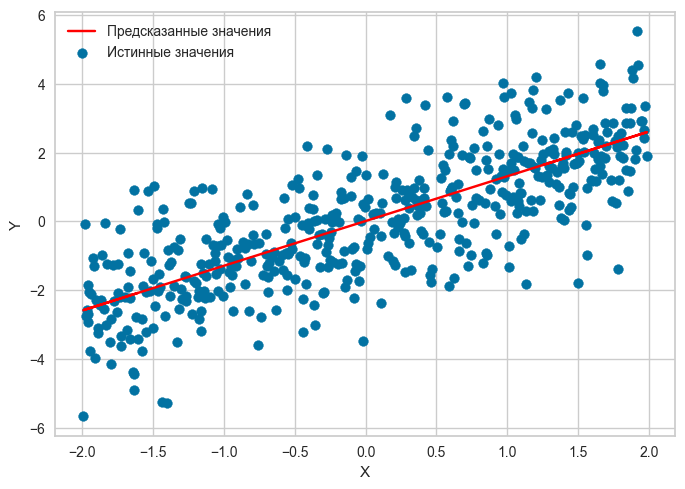

In [66]:
plt.plot(X1_valid, y_predict, label='Предсказанные значения', color='red')
plt.scatter(X1_valid, Y_valid, label='Истинные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Для Модели 2

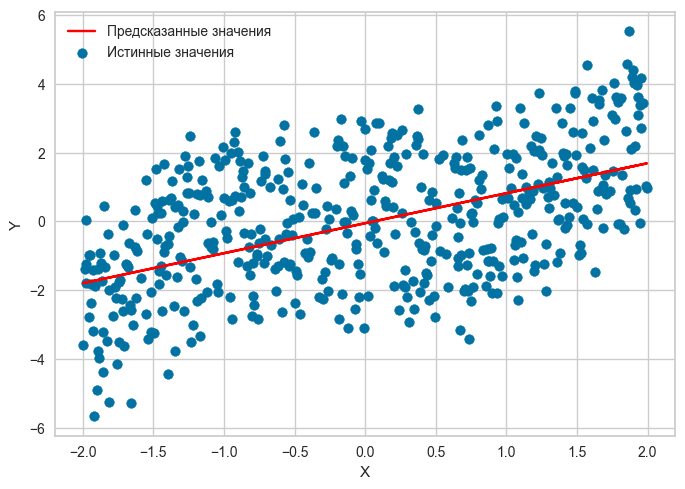

In [67]:
plt.plot(X2_valid, y_predict_2, label='Предсказанные значения', color='red')
plt.scatter(X2_valid, Y_valid, label='Истинные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 2. Полиноминальная регрессия

Полиномиальная регрессия помогает решить проблему недообучения
(underfitting), когда модель не охватывает значительную часть результатов. Целесообразнее применять полиномиальную регрессию для обучения модели на наборе данных x2, так как эти данные сложные, обладают высокой дисперсией, не линейны. Модель, обученная на данных Х2 с помощью линейной регрессии показала себя хуже, чем модель Х1. Возможно, полиноминальная регрессия сможет лучше обучить модель.

Для реализации модели полиномиальной регрессии импортирована PolynomialFeatures. Выбрана степень полинома 2. Создается объект, который добавляет полиномиальные признаки до заданной степени (в данном случае, степени 2). Метод fit_transform принимает входные данные и преобразует их с использованием полиномиальных признаков. Создается model_poly - объект модели линейной регрессии. Fit() обучает модель на полиномиальных признаках X2_poly и целевой переменной Y.

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)
x2_poly = poly_features.fit_transform(x2.reshape(-1, 1))
model_poly = LinearRegression()
model_poly.fit(x2_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Выполнено предсказание, и все предсказанные значения выведены на экран.

In [69]:
y_predict_poly = model_poly.predict(x2_poly)

for  y_poly in y_predict_poly:
    print(y_poly)

1.3468291493713322
-1.5398267283235834
-1.2726072940911428
-0.18475416373917322
-0.17039749720710004
-0.7035138615910329
-0.5388343420905497
0.32207126366146027
-1.5461131626827251
0.24484311922860932
-0.3775286623059418
-0.336545968904938
0.6545186057036829
-1.3152479921365288
0.3200497278562997
1.4715539523711616
0.6984577517380567
0.08420856151369141
0.19716085768938058
-0.4310409794053126
-1.1957921614072908
0.6019301792492426
0.3607741257906231
1.2757145541564145
1.464090266819869
-1.0770530935011442
-0.8899968978431114
-0.7921626187490408
-0.23939652112457574
-0.03667452506353657
-0.505207136262456
0.03811245168630158
-1.0719259002480166
-0.5556118121207658
-1.4747477264272268
0.2515053484908946
1.24793166574223
1.5899771068546822
-0.400217501810613
-1.139208646450233
-0.7906334340334724
-1.5052023979260727
-0.6593095458218631
-1.037020999921917
-0.5929267793166914
0.7762635728474071
-0.07576372670170956
1.2509974990881856
-0.5820777682690774
-0.49321843144741323
-0.0621798259026

Вычислены средняя абсолютная ошибка (MAE) между фактическими и предсказанными значениями и коэффициент детерминации между фактическими значениями (y) и предсказанными значениями (y_predict_poly).

In [70]:
print('Mean Absolute Error 3:', metrics.mean_absolute_error(y, y_predict_poly))
print('R2 metric 3:', metrics.r2_score(y, y_predict_poly))

Mean Absolute Error 3: 1.3932690784527646
R2 metric 3: 0.2556947345417847


MAE = 1.39. Модель ошибается в среднем на 1.39 единицы измерения. Чем меньше значение MAE, тем лучше, поскольку это указывает на более точные предсказания модели. R² = 0.256. Модель объясняет только 25.6% дисперсии данных. Это очень низкий показатель: модель почти не лучше, чем простое среднее значение.


Для визуализации регрессии, с помощью scatter показаны истинные значения, с помощью plot линия, которая представляет собой предсказанные значения для каждого значения X на основе обученной модели полиномиальной регрессии. Визуализация помогает сравнить, насколько хорошо модель соответствует данным.

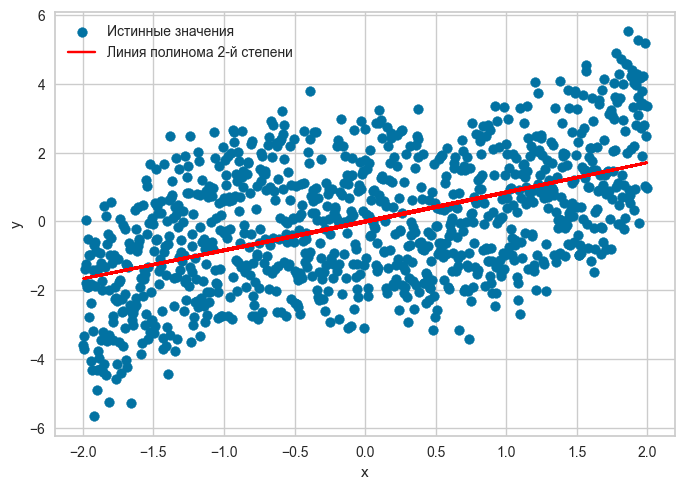

In [71]:
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly, label='Линия полинома 2-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Попробуем увеличить степень полинома, возможно это является причиной плохого обучения модели.

Далее создается объект модели полиномиальной регрессии со степенью полинома равной 3 и проделывается всё то же, что с предыдущей моделью.

1.429546446718893
-2.301465803103569
-1.2068724199681615
0.002673657243667294
0.0009848019845484675
-0.12510561860134117
-0.02899055833026953
-0.047417223048981154
-2.3329943414860668
-0.05029675820917176
0.007554903878011412
0.010027634978657971
0.08188401762224688
-1.3513490044489676
-0.04759107536803191
1.8936820569966222
0.11781018336573039
-0.03736714846958823
-0.04868772166055965
0.0005721123824220554
-0.9727420448951543
0.045531748797509625
-0.042951169912527024
1.1998543370765784
1.8636254119674245
-0.6721942868899797
-0.3314084254684952
-0.2085489160302683
0.007791270132282462
-0.018821966533646848
-0.017309152190435807
-0.030712883204074157
-0.6607862828219354
-0.035731368521646836
-1.9915325140416016
-0.050332184492495324
1.116688643075572
2.4113208158771453
0.0051459908206210846
-0.820626709309391
-0.2068953306797416
-2.1328730053645044
-0.09233493752952175
-0.5863897773239716
-0.053035643439061766
0.1948115893396599
-0.012550215758884183
1.1256886318525632
-0.0476662868892

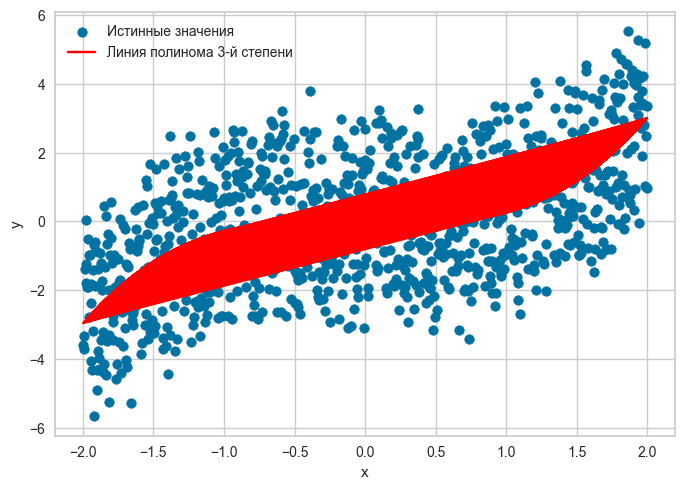

In [72]:
poly_features_3=PolynomialFeatures(degree=3)
x2_poly_3 = poly_features_3.fit_transform(x2.reshape(-1, 1))
model_poly_3 = LinearRegression()
model_poly_3.fit(x2_poly_3, y)
y_predict_poly_3 = model_poly_3.predict(x2_poly_3)

for  y_poly_3 in y_predict_poly_3:
    print(y_poly_3)

print('Mean Absolute Error 4:', metrics.mean_absolute_error(y, y_predict_poly_3))
print('R2 metric 4:', metrics.r2_score(y, y_predict_poly_3))  
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly_3, label='Линия полинома 3-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()  

Стало немного лучше.
Ошибка предсказания снизилась с 1.393 до 1.345. Модель стала немного точнее. 

R² увеличился на 25.4%. Модель теперь объясняет 32.1% дисперсии данных, вместо 25.6%.

Однако, показатели всё еще низкие.

Также линяя полинома на графике стала жирной. Это может свидетельствовать о переобучении, но не в данном случае, судя по показателям. 

Попробуем увеличить степень полинома до 10.

Mean Absolute Error 5: 1.332941950078677
R2 metric 5: 0.32708089067127655


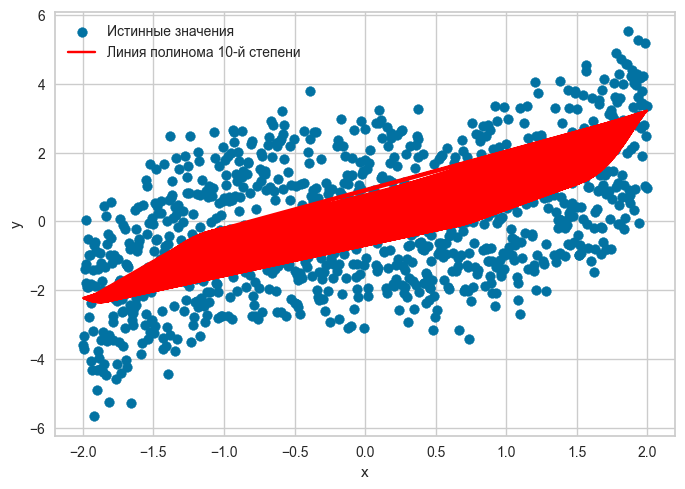

In [73]:
poly_features_10=PolynomialFeatures(degree=10)
x2_poly_10 = poly_features_10.fit_transform(x2.reshape(-1, 1))
model_poly_10 = LinearRegression()
model_poly_10.fit(x2_poly_10, y)
y_predict_poly_10 = model_poly_10.predict(x2_poly_10)

print('Mean Absolute Error 5:', metrics.mean_absolute_error(y, y_predict_poly_10))
print('R2 metric 5:', metrics.r2_score(y, y_predict_poly_10))  
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly_10, label='Линия полинома 10-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()  

Показатели не изменились. Если продолжить увеличивать степень полинома, то показатели будут оставаться такими же.

Возможные причины: это максимально возможная точность для моих данных, или нужны не полиномиальные, а другие преобразования, или данные не имеют полиномиальной зависимости.

# 3. Решение задачи регрессии различными методами


Набор данных о сотрудниках: salary.csv

Атрибуты: dtypes – тип значений в столбцах,
columns – список с названиями столбцов
shape – размер таблицы, содержит кортеж из количества строк и столбцов.

Описание набора данных:

age — возраст сотрудника в годах.

income — годовой доход до текущей работы.

experience — количество полных лет профессионального опыта.

score_test — результат прохождения профессионального теста

hours_worked — среднее количество рабочих часов в неделю.

distance_to_work — расстояние от дома до места работы.

savings — сумма сбережений на банковском счёте.

debt — общий объём текущих долгов (по кредитам, картам и другим
обязательствам, в долларах).

education — уровень образования: «High School» (школа), «Bachelor»
(бакалавр), «Master» (магистр) или «PhD» (доктор наук).

city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или
Финикс.

job_type — сфера профессиональной деятельности: IT, финансы,
здравоохранение, образование или ритейл.

marital_status — семейное положение: «Single» (холост/незамужем), «Married»
(в браке) или «Divorced» (в разводе).

car — наличие автомобиля: «Yes» (есть) или «No» (нет).

remote_work — работает ли сотрудник удалённо: «Yes» или «No».

salary — : годовая зарплата

In [106]:
import pandas as pd
df = pd.read_csv('C:/Users/User/Documents/Анализ данных/salary.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


В качестве целевой выбрана переменная зарплата (salary). Для salary построена гистограмма.

<Axes: xlabel='salary', ylabel='Count'>

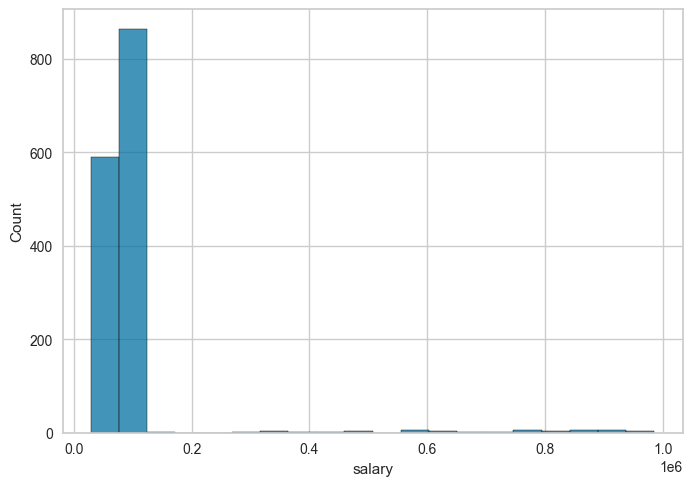

In [107]:
import seaborn as sns
sns.histplot(df['salary'], bins = 20)

Гистограмма по столбцу salary показывает, что наибольшее количество сотрудников имеют зарплату от 50000 до 150000 в год.

Также по столбцу salary построен boxplot.

<Axes: >

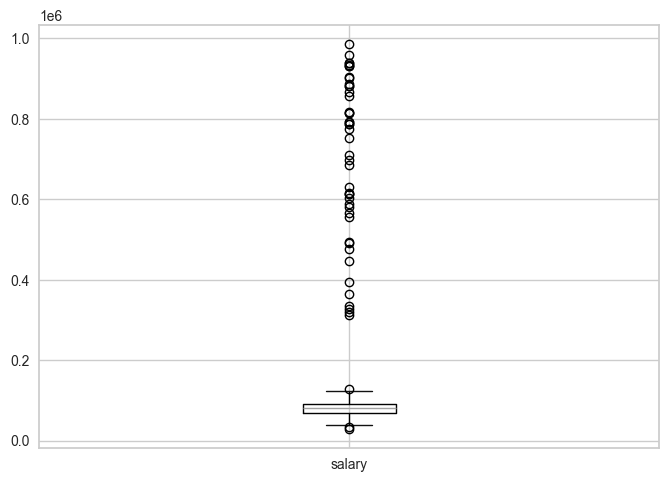

In [76]:
df.boxplot(column='salary')

Boxplot показывает, что медиана сильно смещена вниз, значит большее количество наблюдений находится ближе к минимальным значениям. Также наблюдается большое количество выбросов, которые указывают на то, что есть значения, которые находятся далеко от основных данных. Ящик показывает разброс данных.

Для удаления выбросов был применен метод межквартильного размаха (IQR) для удаления выбросов в колонке salary 

In [108]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_c = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

Составлен новый boxplot 

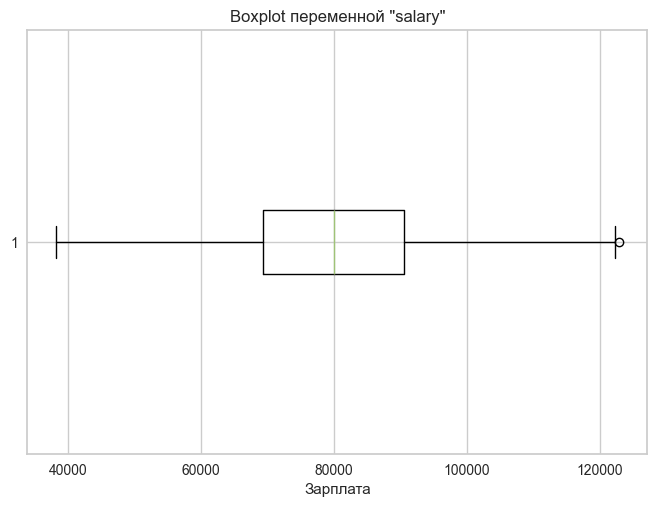

In [109]:
plt.boxplot(df_c['salary'], vert=False)
plt.title('Boxplot переменной "salary"')
plt.xlabel('Зарплата')
plt.show()

Медианная зарплата составляет 80000

Построена матрица диаграммы рассеяния с использованием pairplot для столбцов с зарплатой, результатом проф. теста и доходом на предыдущей работе. Для раскраски столбцов используется столбец с указанем города сотрудника.

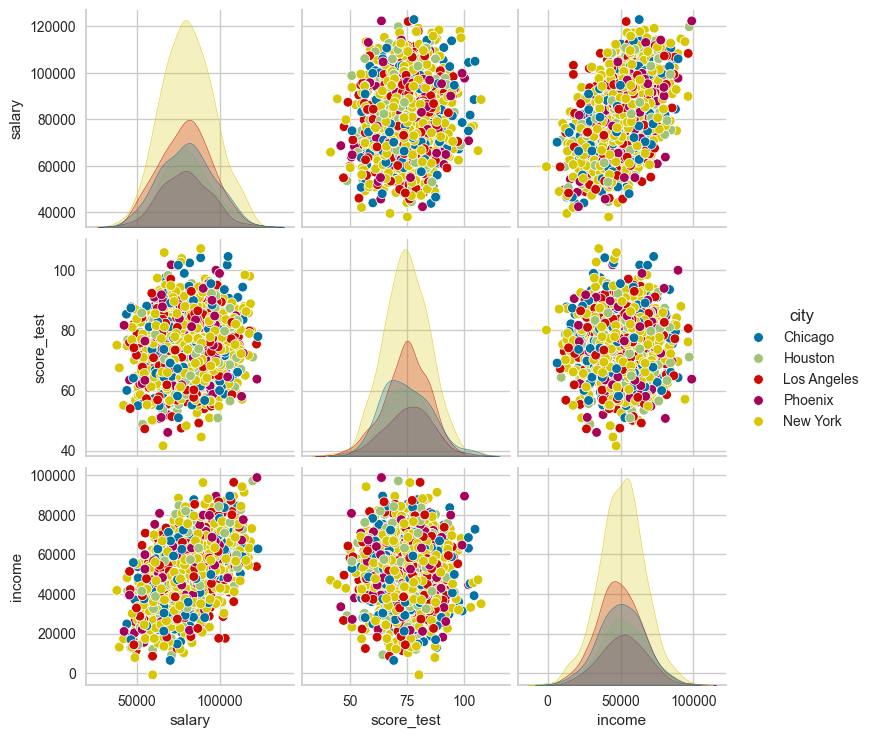

In [110]:
sns.pairplot(df_c[['salary', 'score_test', 'income', 'city']], hue='city')

Диаграммы показывают, что большинство сотрудников из Нью-Йорка и получают, зачастую, больше остальных. 

Наблюдается очень слабая корреляция между результатами теста и зарплатой. Высокие результаты теста не гарантируют высокую зарплату, и наоборот.

Далее данные были разделены на обучающую и валидационную выборки. В данном случае в переменной X присваиваются значения, которые будут использоваться для обучения модели, присвоены все значения из всех числовых столбцов кроме salary. Y- переменная salary, которую надо предсказать. Train_test_split разделяет данные на обучающую (X_train, Y_train) и валидационные (X_valid, Y_valid) выборки. Test_size=0.50 означает, что 50% данных будут отложены для тестирования. Установка random_state на 0 гарантирует, что при каждом запуске кода будут выбраны одни и те же случайные данные для обучающей и тестовой выборки.

In [121]:
from sklearn.model_selection import train_test_split
X = df_c.select_dtypes(include='number').drop (['salary'], axis=1)
Y = df_c['salary']
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X,
    Y,
    test_size=0.50,
    random_state=0)

Далее создан объект StandartScaler, данные нормализированы. 

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_c = sc.fit_transform(X_train)
X_valid_c = sc.fit_transform(X_valid)

Предсказаны значения и для оценки качества модели вычислены метрики.

In [113]:
model_4 = LinearRegression()
model_4.fit(X_train_c, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_predict_4 = model_4.predict(X_valid_c)

In [84]:
print('Mean Absolute Error 4:', metrics.mean_absolute_error(Y_valid, y_predict_4))
print('Mean Squared Error 4:', metrics.mean_squared_error(Y_valid, y_predict_4))
print('Root Mean Squared Error 4:', np.sqrt(metrics.mean_squared_error(Y_valid, y_predict_4)))
print('R2 metric 4:', metrics.r2_score(Y_valid, y_predict_4))

Mean Absolute Error 4: 6730.361308379134
Mean Squared Error 4: 71865658.11185157
Root Mean Squared Error 4: 8477.361506497855
R2 metric 4: 0.6774315442959138


Среднеквадратичное отклонение, среднее абсолютное отклонение, стандартное отклонение ошибок модели очень велики. Коэффициент детерминации 0.68, что указывает на неплохую предсказательную способность модели.

Средняя ошибка предсказания 6730 долларов. В контексте зарплат это приемлемая погрешность за год.

Стандартное отклонение ошибок 8477



Создан датафрейм с истинными и предсказанными значениями 

In [85]:
df= pd.DataFrame({'Actual': Y_valid, 'Predicted':y_predict_4})
df

,Actual,Predicted
1417,38091.827270,59158.095385
502,92747.084451,94061.991321
1334,80481.558048,80047.109429
281,86092.141598,92163.555005
289,75819.406791,77004.186492
...,...,...
273,101991.062473,89878.447508
6,92451.866841,79617.106382
277,77690.785716,77093.260754
39,91527.413802,95506.438989


Создан и выведен датафрейм с признаками и их коэффициентами 

In [86]:
a = model_4.coef_
b = model_4.intercept_
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient_a': a, 'Coefficient_b': b})

print(coeff_df)

            Feature  Coefficient_a  Coefficient_b
0               age     725.843837   80401.381846
1            income    7434.664157   80401.381846
2        experience   10389.300323   80401.381846
3        score_test    1226.605327   80401.381846
4      hours_worked     442.964612   80401.381846
5  distance_to_work     328.535292   80401.381846
6           savings     145.254436   80401.381846
7              debt    -604.214052   80401.381846


Experience является самым важным признаком. Каждый дополнительный год опыта увеличивает зарплату примерно на 10389 долларов. Этот признак имеет наибольшее влияние на зарплату.

Income второй по важности. Предыдущий доход сильно влияет на текущую зарплату.

Score_test третий по важности. Результаты профессионального теста значимо влияют на зарплату, хотя матрица диаграмм рассеяния показывала слабую корреляцию между результатами теста и зарплатой.

Признаки с умеренным: age (возраст), hours_worked (количество рабочих часов) и distance_to_work (расстояние до работы).

Слабое влияние оказывает признак savings (сбережения)

debt – единственный признак с отрицательным коэффициентом. Сотрудники с большими долгами получают меньше.


Для визуализации создан график с истинными и предсказанными значениями

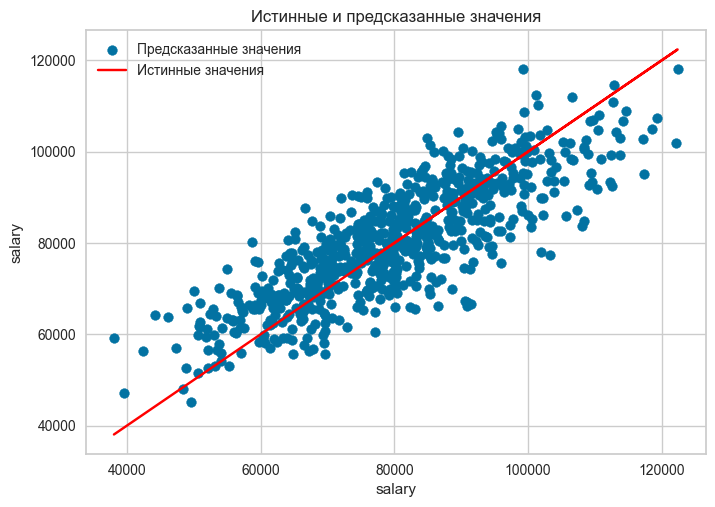

In [87]:
plt.scatter(Y_valid, y_predict_4, label='Предсказанные значения')
plt.plot(Y_valid, Y_valid, color='red', label='Истинные значения')
plt.title("Истинные и предсказанные значения")
plt.xlabel("salary")
plt.ylabel("salary")
plt.legend()
plt.show()

Из визуализации можно понять, что точки близки к диагональной линии — значит предсказания достаточно точные. Нет систематического смещения, ошибки распределены случайно

Однако, разброс все еще значительный. 
В области высоких зарплат больше разброса, значит модель хуже предсказывает высокие зарплаты
А в области низких некоторые точки значительно выше диагонали - прогнозы завышены.



# Вывод

В ходе лабораторной работы были изучены и применены на практике различные методы регрессионного анализа для прогнозирования числовых значений.

Были созданы две модели с помощью простой линейной регрессии, изучены полученные метрики и визуализации.

Полиномиальная регрессия была применена для улучшения качества предсказаний на сложных нелинейных данных (X2). Наилучший результат достигнут при степени полинома 3 (R² = 0.321), однако дальнейшее увеличение степени не привело к улучшению метрик, что указывает на ограниченность полиномиального подхода для данных характеристик. Верный подбор степени полинома имеет важное значение при обучении модели полиномиальной регрессии. 

Регрессия на реальных данных о зарплатах сотрудников показала удовлетворительные результаты (R² = 0.68). Анализ коэффициентов выявил, что наиболее значимыми факторами, влияющими на зарплату, являются: опыт работы (наибольшее влияние), предыдущий доход, результаты профессионального теста.


1 3 6 13 доп разделить набор данных

# Дополнительные задания

### 1. 
Закодировать категориальные переменные с помощью порядкового кодировщика.
Обучить модели на новых данных. Сравнить качество модели, в которой не
использовались категориальные признаки с закодированными категориальными
переменными.

Было использовано Ordinal Encoding (Порядковое кодирование) всех категориальных признаков датафрейма.

Далее разделение данных на обучающую и тестовую выборки.

Обучение модели RandomForestRegressor (Случайный лес).



In [94]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df = pd.read_csv('C:/Users/User/Documents/Анализ данных/salary.csv')
categorical_columns = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

education_order = ['High School', 'Bachelor', 'Master', 'PhD']
marital_order = ['Single', 'Married', 'Divorced']
remote_order = ['No', 'Yes']

encoder = OrdinalEncoder(categories=[education_order, 
                                    sorted(df['city'].unique()), 
                                    sorted(df['job_type'].unique()),
                                    marital_order,
                                    sorted(df['car'].unique()),
                                    remote_order])

df_encoded = df.copy()
df_encoded[categorical_columns] = encoder.fit_transform(df[categorical_columns])

X = df_encoded.drop('salary', axis=1)
y = df_encoded['salary']

X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(X, y, test_size=0.2, random_state=42)

model_6= RandomForestRegressor(n_estimators=100, random_state=42)
model_6.fit(X_train_oe, y_train_oe)

Y_prediction_oe =model_6.predict(X_test_oe)

MSE = mean_squared_error(y_test_oe, Y_prediction_oe )
MAE = mean_absolute_error(y_test_oe, Y_prediction_oe)
R2 = r2_score(y_test_oe, Y_prediction_oe)

print("MSE:", MSE)
print("MAE:", MAE)
print("R2:", R2)

MSE: 14993089752.683014
MAE: 43996.407811303405
R2: -0.08879487415460074


Отрицательный коэффициент детерминации означает, что модель хуже предсказывает целевую переменную, чем простое предсказание среднего значения целевой переменной для всех тестовых образцов. Модель непригодна для использования. Показатели гораздно хуже чем показатели модели множественной регрессии, обученной на числовых данных.

### 3.
Реализовать регрессию методом k-ближайших соседей.

Метод k-ближайших соседей заключается в том, что 
прогноз строится по k-ближайшим объектам, этот метод требует нормализации 
входных данных, при этом k – гиперпараметр, который подбирается.

Для реализации регрессии методом k-ближайших соседей, создана и обучена модель k-ближайших соседей, посчитаны метрики, реализован график.

MSE: 1.563035467424832
MAE: 0.957670754620017
R2: 0.5756582218924979


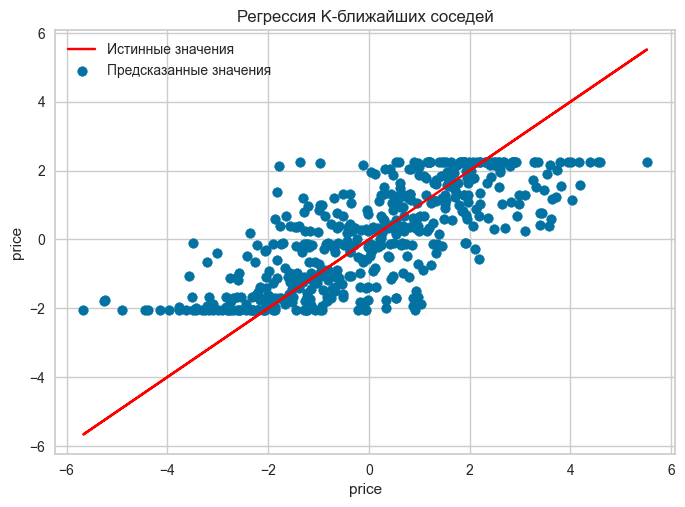

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

df = pd.read_excel('regression.xlsx')

x1 = df['x1'].values
x2 = df['x2'].values
y = df['y'].values

X1_train_n, X1_valid_n, Y_train_n, Y_valid_n = train_test_split(
    x1,
    y,
    test_size=0.50,
    random_state=0)

knn_model = KNeighborsRegressor(n_neighbors=100)
knn_model.fit(np.array(X1_train_n).reshape(-1,1), Y_train_n)

Y1_prediction_n =knn_model.predict(np.array(X1_valid_n).reshape(-1,1))

MSE = mean_squared_error(Y_valid_n, Y1_prediction_n )
MAE = mean_absolute_error(Y_valid_n, Y1_prediction_n)
R2 = r2_score(Y_valid_n, Y1_prediction_n)

print("MSE:", MSE)
print("MAE:", MAE)
print("R2:", R2)


plt.plot(Y_valid_n, Y_valid_n,color='red', label="Истинные значения")
plt.scatter(Y_valid_n, Y1_prediction_n, label="Предсказанные значения")
plt.xlabel("price")
plt.ylabel("price")
plt.title("Регрессия K-ближайших соседей")
plt.legend()
plt.show()

Метрики показывают умеренную производительность модели. Модель объясняет примерно 57.6% дисперсии целевой переменной. В среднем модель ошибается примерно на 1.25 единицы. 

### 6.
Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN.
Сравнить качество модели для подобранных параметров и любых других.

Для осуществления подбора оптимальных параметров, из библиотеки sklearn импортируется GridSearchCV. Создается сетка параметров Param_grid(), которые GridSearchCV будет исследовать, чтобы найти лучшие параметры для линейной регрессии. Fit_intercept указывает будет ли модель иметь параметр смещения. Positive указывает, можно ли принимать во внимание только положительные коэффициенты при оценке модели линейной регрессии. Создается объект GridSearchCV с указанием модели, сетки параметров param_grid, количества блоков перекрестной проверки (cv=5), и метрика по отрицательному среднеквадратичному отклонению (scoring='neg_mean_squared_error'). Best_params содержит лучшие значения параметров, найденные в процессе поиска. Best_model содержит лучшую модель, обученную с лучшими параметрами.

In [90]:
from sklearn.model_selection import GridSearchCV

model_5=KNeighborsRegressor(n_neighbors=100)

param_grid = {
    'n_neighbors': range(50, 150),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid.fit(np.array(X1_train_n).reshape(-1,1), Y_train_n)

best_params = grid.best_params_
best_model = grid.best_estimator_
best_params

{'algorithm': 'auto', 'n_neighbors': 51, 'p': 1, 'weights': 'uniform'}

In [91]:
Y_prediction_nn = best_model.predict(np.array(X1_valid).reshape(-1,1))

MSE = mean_squared_error(Y_valid_n, Y_prediction_nn )
MAE = mean_absolute_error(Y_valid_n, Y_prediction_nn)
RMSE= np.sqrt(MSE)
R2 = r2_score(Y_valid_n, Y_prediction_nn)

print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R2:", R2)

MSE: 1.5996893441894557
MAE: 0.9732114626259217
RMSE: 1.2647882606149756
R2: 0.5657072184987878


Модель, оптимизированная с помощью GridSearchCV, показала немного худшие результаты по сравнению с базовой моделью.Коэффициент детерминации eменьшился с 0.5757 до 0.5657. Параметры, найденные как "оптимальные" во время кросс-валидации, могли быть идеальными для подмножеств данных, используемых в обучении/валидации, но хуже обобщились на итоговом тестовом наборе, на котором вы считали финальные метрики.

### 13.
Построить графики остатков и предсказаний по реализованным моделям и
сделать выводы по ним.

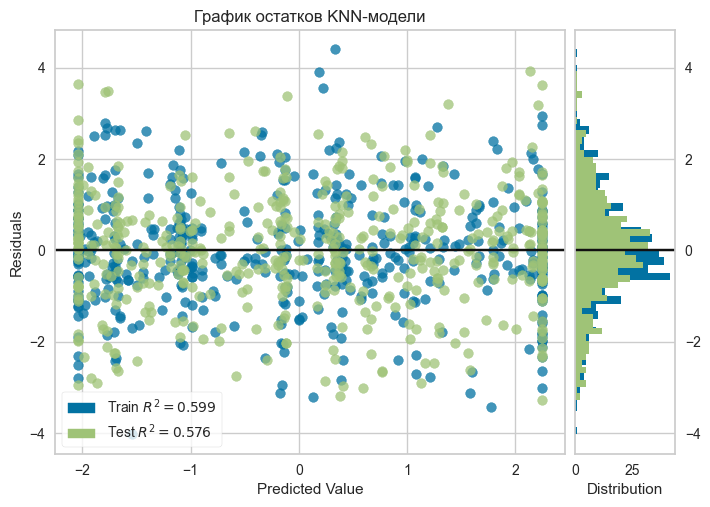

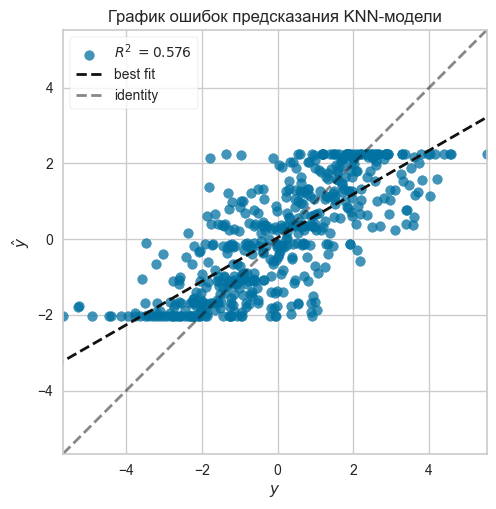

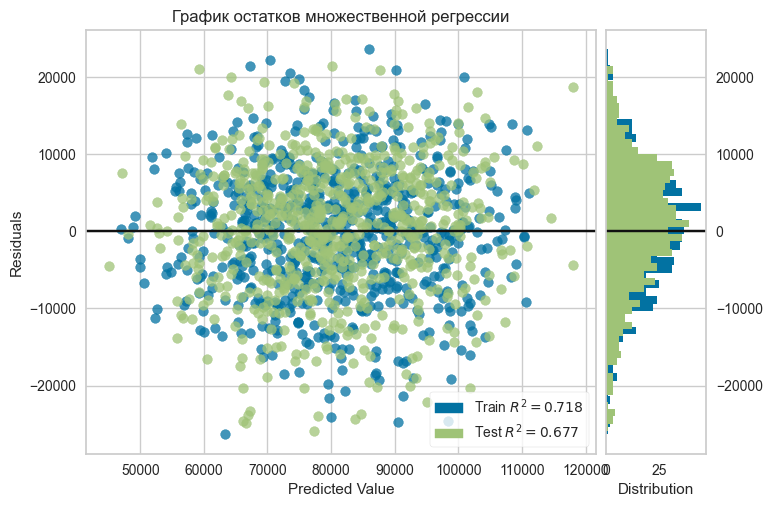

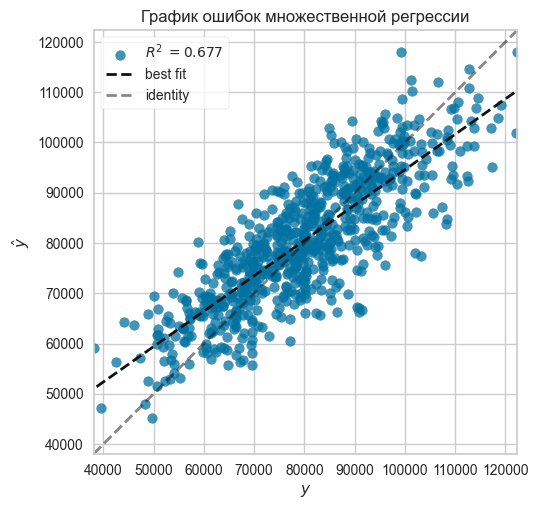

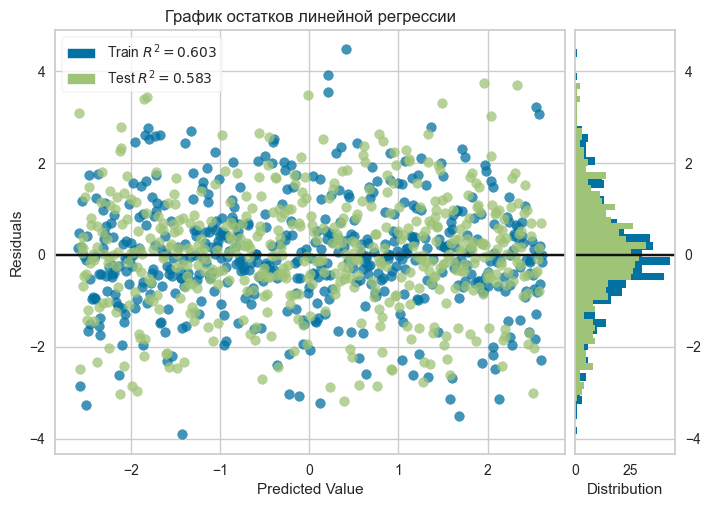

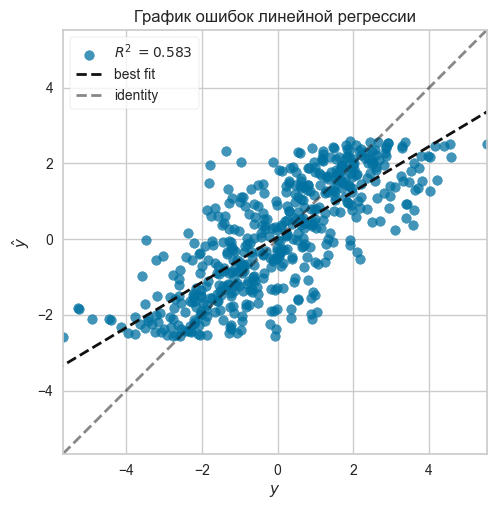

<Axes: title={'center': 'График ошибок линейной регрессии'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [127]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
visualizer = ResidualsPlot(knn_model, title='График остатков KNN-модели')
visualizer.fit(np.array(X1_train_n).reshape(-1,1), Y_train_n) 
visualizer.score(np.array(X1_valid_n).reshape(-1,1), Y_valid_n)
visualizer.show()               
visualizer = PredictionError(knn_model, title='График ошибок предсказания KNN-модели')
visualizer.fit(X1_train_n, Y_train_n)  
visualizer.score(np.array(X1_valid_n).reshape(-1,1), Y_valid_n) 
visualizer.show()   

visualizer = ResidualsPlot(model_4, title='График остатков множественной регрессии')
visualizer.fit(X_train_c, Y_train) 
visualizer.score((X_valid_c), Y_valid)
visualizer.show()               
visualizer = PredictionError(model_4, title='График ошибок множественной регрессии')
visualizer.fit(X_train_c, Y_train)  
visualizer.score((X_valid_c), Y_valid) 
visualizer.show() 

visualizer = ResidualsPlot(model_1, title='График остатков линейной регрессии')
visualizer.fit(np.array(X1_train_11).reshape(-1,1), Y_train_11) 
visualizer.score(np.array(X1_valid_11).reshape(-1,1), Y_valid_11)
visualizer.show()               
visualizer = PredictionError(model_1, title='График ошибок линейной регрессии')
visualizer.fit(np.array(X1_train_11).reshape(-1,1), Y_train_11)  
visualizer.score(np.array(X1_valid_11).reshape(-1,1), Y_valid_11) 
visualizer.show() 

Множественная регрессия значительно превосходит остальные модели по предсказательной способности. Использование нескольких признаков вместо одного дало ощутимое улучшение качества предсказаний. Линейная регрессия - хуже.